In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import missingno as msno
from scipy.stats import ttest_ind

In [2]:
# Importamos el PLK
input_path = Path("data") / "staySpain_transformed.pkl"
df_transformed = pd.read_pickle(input_path)

In [3]:
df_transformed["city"].value_counts()

city
barcelona    2261
madrid       1645
mallorca     1265
girona       1198
sevilla       403
malaga        394
valencia      360
menorca       167
Name: count, dtype: int64

In [32]:
df_transformed["room_type"].value_counts()

room_type
Entire Home Apt    5453
Private Room       2138
Hotel Room           53
Shared Room          49
Name: count, dtype: int64

In [4]:
# Visualizamos todas las columnas en el output
pd.set_option("display.max_columns", None)

# Tratamientos de nulos en las columnas de review

In [5]:
# Comprobamos nulos en el df
df_transformed.isna().sum()

apartment_id                      0
name                              0
description                       0
host_id                           0
neighbourhood_name                0
neighbourhood_district         3024
room_type                         0
accommodates                      0
bathrooms                        43
bedrooms                         38
beds                              8
amenities_list                   16
price                             0
pricexperson                      0
minimum_nights                    0
maximum_nights                    0
has_availability                534
availability_30                   0
ocupation30                       0
ocup%30                           0
availability_60                   0
ocupation60                       0
availability_90                   0
ocupation90                       0
availability_365                  0
ocupation365                      0
number_of_reviews                 0
first_review_date           

In [6]:
# Filtramos todos aquellos registros con number_of_reviews = 0
df_filtered = df_transformed[df_transformed["number_of_reviews"] > 0]

In [7]:
# Comprobamos cuantos nulos quedan
df_filtered.isna().sum()

apartment_id                      0
name                              0
description                       0
host_id                           0
neighbourhood_name                0
neighbourhood_district         2185
room_type                         0
accommodates                      0
bathrooms                        32
bedrooms                         31
beds                              0
amenities_list                    8
price                             0
pricexperson                      0
minimum_nights                    0
maximum_nights                    0
has_availability                411
availability_30                   0
ocupation30                       0
ocup%30                           0
availability_60                   0
ocupation60                       0
availability_90                   0
ocupation90                       0
availability_365                  0
ocupation365                      0
number_of_reviews                 0
first_review_date           

<Axes: >

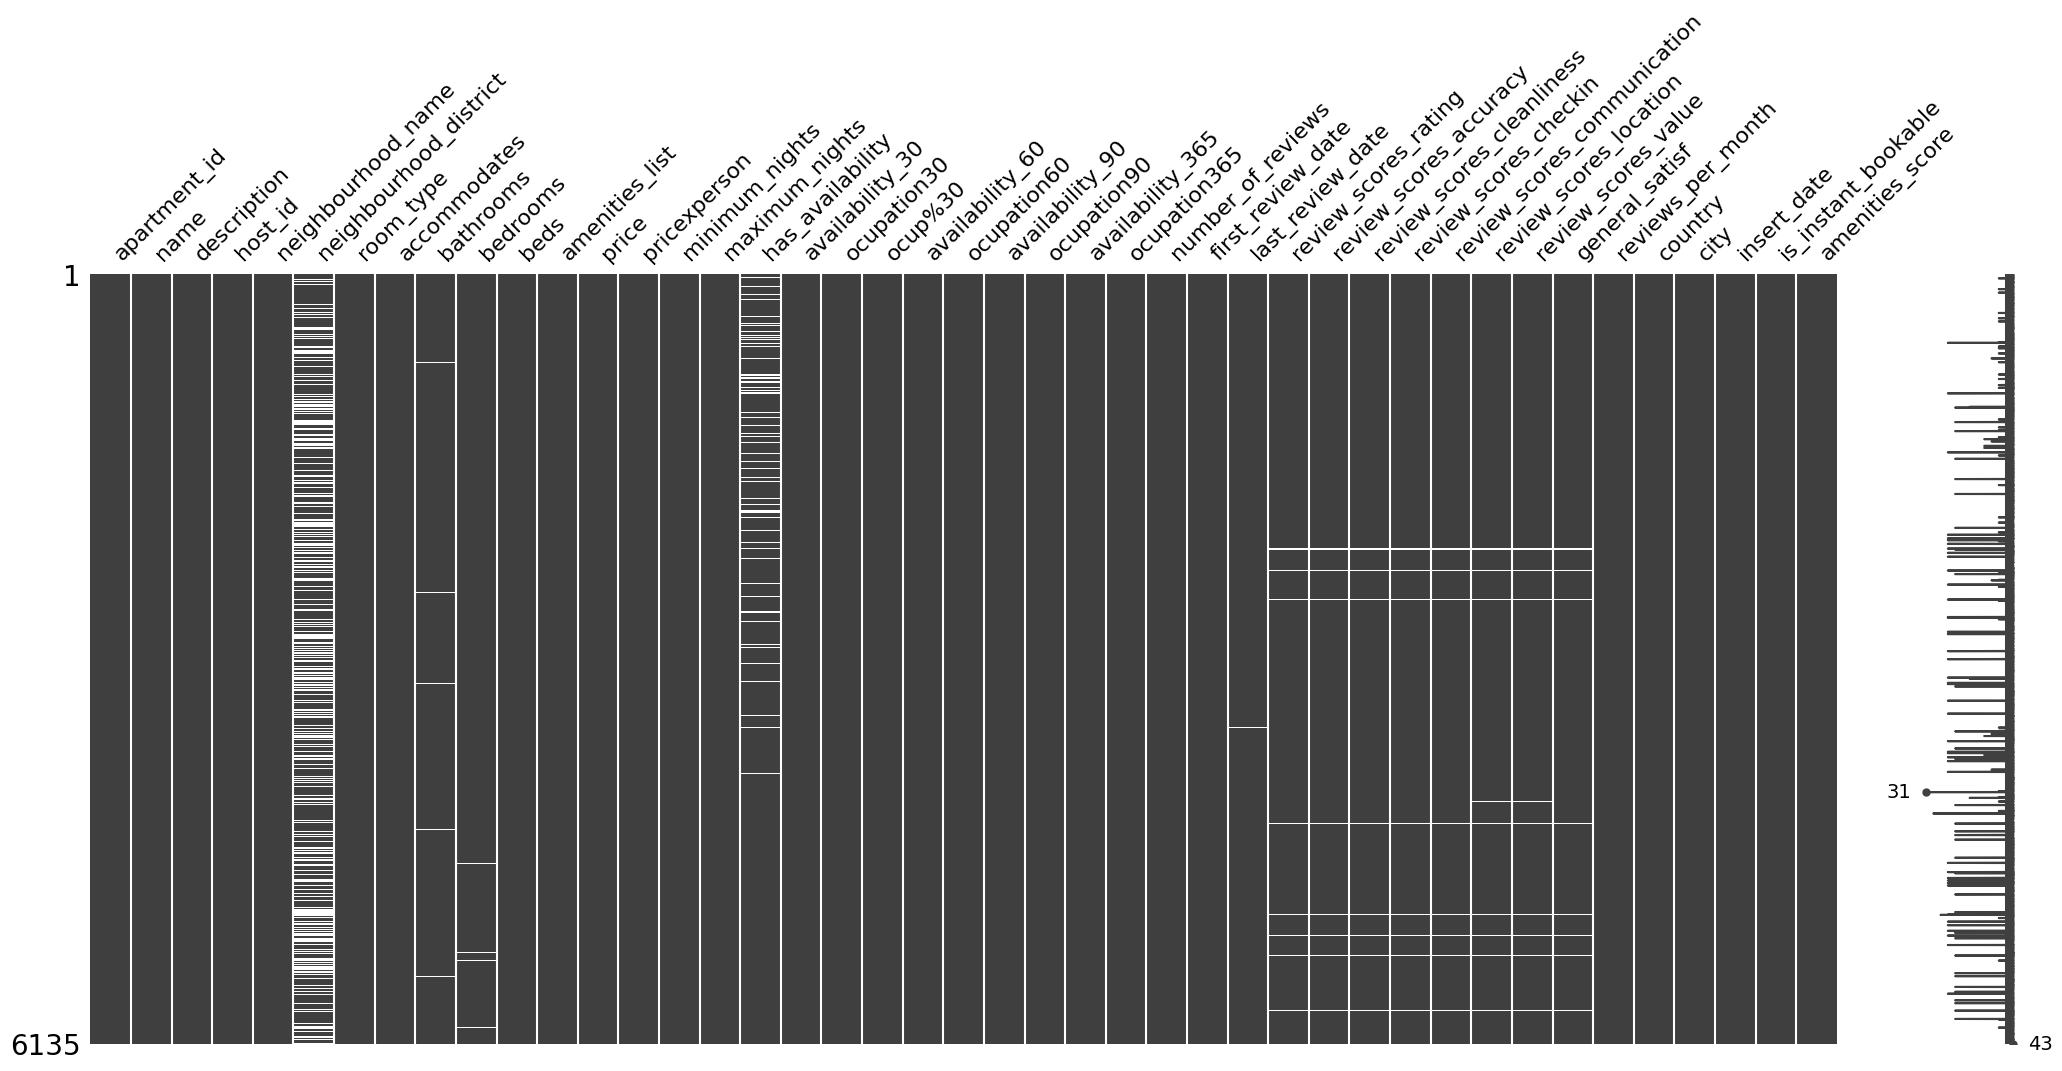

In [12]:
# Matrix para ver la distribución de los NaN por campos
msno.matrix(df_filtered)

In [13]:
# Creamos una lista con los registros que queremos analizar para identificar NaN comunes 
cols = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_location",
    "review_scores_value"
]

# Filtramos registros donde todas esas columnas son NaN y los excluimos de nuestro df_filtered
df_filtered = df_filtered[~df_filtered[cols].isna().all(axis=1)]
df_filtered

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,pricexperson,minimum_nights,maximum_nights,has_availability,availability_30,ocupation30,ocup%30,availability_60,ocupation60,availability_90,ocupation90,availability_365,ocupation365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,general_satisf,reviews_per_month,country,city,insert_date,is_instant_bookable,amenities_score
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private Room,2,2,1,1,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,200.000000,3,365,True,7,23,76.666667,20,40,40,50,130,235,78,2010-01-02,2017-09-05,97.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,75.0,spain,malaga,2018-07-31,False,40.0
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,Crmenes,Latina,Private Room,1,1,1,1,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,170.000000,4,40,True,0,30,100.000000,0,60,0,90,162,203,33,2014-10-10,2018-07-15,92.0,9.0,9.0,10.0,10.0,8.0,9.0,9.2,52.0,spain,madrid,2020-01-10,False,58.0
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire Home Apt,4,1,2,2,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,247.500000,2,120,True,26,4,13.333333,31,29,31,59,270,95,148,2011-01-05,2019-07-22,98.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,142.0,spain,sevilla,2019-07-29,True,48.0
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,L'Antiga Esquerra De L'Eixample,Eixample,Private Room,2,2,1,1,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,200.000000,2,730,True,9,21,70.000000,23,37,49,41,300,65,292,2012-03-13,2020-01-04,94.0,10.0,9.0,10.0,10.0,10.0,9.0,9.8,306.0,spain,barcelona,2020-01-10,True,56.0
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private Room,5,1,2,5,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,180.000000,1,180,True,0,30,100.000000,19,41,49,41,312,53,36,2011-07-08,2018-08-08,97.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,39.0,spain,girona,2019-02-19,False,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7990,32371692,1 Doble Room w Bathroom in Centric Beautiful Flat,Quieres pasar unos d�as fant�sticos en Barcelo...,9350314,El Raval,Ciutat Vella,Private Room,2,1,1,1,"TV,Wifi,Air conditioning,Kitchen,Smoking allow...",750.0,375.000000,2,6,True,19,11,36.666667,39,21,63,27,63,302,1,2019-02-25,2019-02-25,100.0,10.0,6.0,10.0,10.0,10.0,10.0,9.2,38.0,spain,barcelona,2019-05-14,False,43.0
7994,32391703,Traumfinca Mallorca in Santanyi f�r bis 10Pers...,"Die Finca besticht durch ihre einzigartige, ru...",85486707,Santany,NaN,Private Room,2,1,1,2,"TV,Wifi,Pool,Kitchen,Free parking on premises,...",1300.0,650.000000,5,1125,True,29,1,3.333333,59,1,89,1,357,8,6,2019-07-02,2019-09-23,100.0,10.0,10.0,9.0,9.0,10.0,10.0,9.6,85.0,spain,mallorca,2020-01-29,False,45.0
7996,32392774,? Tu Hogar de Lujo ????? en el Centro de Sevilla,"Exclusivo, amplio y luminoso alojamiento situa...",243246681,Arenal,Casco Antiguo,Entire Home Apt,6,2,3,4,"Patio or balcony, Long term stays allowed, Sha...",2090.0,348.333333,2,60,True,0,30,100.000000,11,49,41,49,41,324,36,2019-03-17,2020-09-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,157.0,spain,sevilla,2021-01-31,False,68.0
7998,32407332,LUMINOSO Y ENCANTADOR PISO CERCA DE TODO,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,187631805,Provenals Del Poblenou,Sant Mart�,Private Room,3,2,2,2,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",960.0,320.000000,2,15,Tr

In [14]:
df_filtered.isna().sum()

apartment_id                      0
name                              0
description                       0
host_id                           0
neighbourhood_name                0
neighbourhood_district         2145
room_type                         0
accommodates                      0
bathrooms                        32
bedrooms                         31
beds                              0
amenities_list                    8
price                             0
pricexperson                      0
minimum_nights                    0
maximum_nights                    0
has_availability                407
availability_30                   0
ocupation30                       0
ocup%30                           0
availability_60                   0
ocupation60                       0
availability_90                   0
ocupation90                       0
availability_365                  0
ocupation365                      0
number_of_reviews                 0
first_review_date           

In [15]:
# Imputación de nulls

cols_con_nan = [
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]

for col in cols_con_nan:
    df_filtered[col] = df_filtered[col].fillna(df_filtered["review_scores_rating"] / 10)

In [16]:
df_filtered.isna().sum()

apartment_id                      0
name                              0
description                       0
host_id                           0
neighbourhood_name                0
neighbourhood_district         2145
room_type                         0
accommodates                      0
bathrooms                        32
bedrooms                         31
beds                              0
amenities_list                    8
price                             0
pricexperson                      0
minimum_nights                    0
maximum_nights                    0
has_availability                407
availability_30                   0
ocupation30                       0
ocup%30                           0
availability_60                   0
ocupation60                       0
availability_90                   0
ocupation90                       0
availability_365                  0
ocupation365                      0
number_of_reviews                 0
first_review_date           

# Categorización según review_scores_rating

In [17]:
df_filtered["review_scores_rating"].describe()

count    6052.000000
mean       91.944151
std         8.970997
min        20.000000
25%        89.000000
50%        94.000000
75%        98.000000
max       100.000000
Name: review_scores_rating, dtype: float64

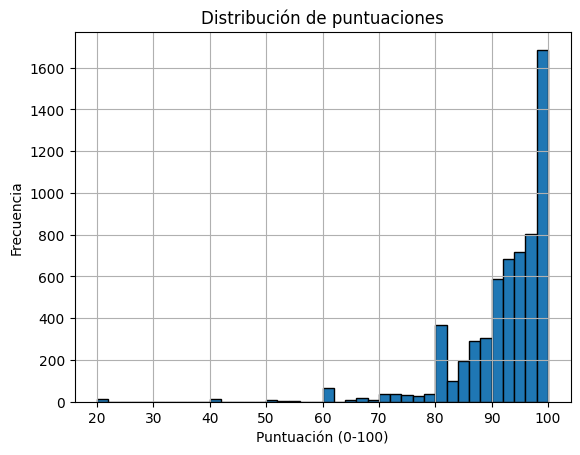

In [18]:
df_filtered["review_scores_rating"].hist(bins=40, edgecolor="black")
plt.title("Distribución de puntuaciones")
plt.xlabel("Puntuación (0-100)")
plt.ylabel("Frecuencia")
plt.show()

In [19]:
df_filtered["review_scores_rating"].value_counts()

review_scores_rating
100.0    1086
93.0      424
97.0      405
95.0      399
96.0      399
98.0      380
90.0      352
80.0      340
94.0      316
92.0      258
91.0      238
99.0      220
87.0      192
89.0      155
88.0      151
85.0      118
86.0      100
84.0       78
60.0       65
83.0       62
82.0       37
70.0       33
81.0       28
73.0       27
78.0       26
75.0       25
77.0       19
67.0       17
40.0       15
20.0       15
79.0       11
72.0       11
76.0       10
71.0        6
50.0        6
74.0        5
65.0        4
64.0        4
53.0        3
69.0        3
68.0        3
55.0        2
63.0        1
66.0        1
47.0        1
30.0        1
Name: count, dtype: int64

In [20]:
# Clasificamos por grupos según el rango de "review_scores_rating"
df_filtered['classification'] = pd.qcut(df_filtered['review_scores_rating'], q=5, labels=["Malo", "Aceptable", "Bueno", "Muy bueno", "Excelente"])
df_filtered.groupby('classification')['review_scores_rating'].max()
df_filtered.groupby('classification')['review_scores_rating'].min()

C:\Users\Alex\AppData\Local\Temp\ipykernel_20968\1001218566.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby('classification')['review_scores_rating'].max()
C:\Users\Alex\AppData\Local\Temp\ipykernel_20968\1001218566.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby('classification')['review_scores_rating'].min()


classification
Malo          20.0
Aceptable     88.0
Bueno         93.0
Muy bueno     97.0
Excelente    100.0
Name: review_scores_rating, dtype: float64

In [21]:
df_filtered["classification"].value_counts()

classification
Bueno        1538
Malo         1269
Aceptable    1154
Excelente    1086
Muy bueno    1005
Name: count, dtype: int64

In [22]:
# Media de los items por grupo de valoración
df_filtered.groupby("classification")[cols].mean().round(2)

C:\Users\Alex\AppData\Local\Temp\ipykernel_20968\4218758028.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby("classification")[cols].mean().round(2)


,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value
classification,,,,,,
Malo,78.83,8.44,8.29,8.91,9.06,8.07
Aceptable,90.26,9.30,9.14,9.60,9.47,8.98
Bueno,94.50,9.77,9.57,9.84,9.65,9.33
Muy bueno,97.82,9.97,9.89,9.97,9.77,9.79
Excelente,100.00,9.86,9.78,9.86,9.71,9.68


In [23]:
# Filtramos por los alojamientos con calificación "Excelente"
df_mejor_rating = df_filtered[df_filtered["classification"] == "Excelente"]
df_mejor_rating

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,pricexperson,minimum_nights,maximum_nights,has_availability,availability_30,ocupation30,ocup%30,availability_60,ocupation60,availability_90,ocupation90,availability_365,ocupation365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,general_satisf,reviews_per_month,country,city,insert_date,is_instant_bookable,amenities_score,classification
79,461943,Lovely DoubleRoom Barcelona Center,I invite you to my amazing apartment in the mo...,2293257,La Nova Esquerra De L'Eixample,Eixample,Private Room,2,1,1,1,"Internet,Wireless Internet,Elevator in buildin...",490.0,245.000000,3,30,NaN,19,11,36.666667,49,11,79,11,79,286,1,2017-06-05,2017-06-05,100.0,10.0,10.0,6.0,10.0,8.0,8.0,8.8,10.0,spain,barcelona,2017-06-05,True,23.0,Excelente
117,590991,Beautiful Cheap Double NEAR BEACH!!,We have a 3 Double Bedroom apartment 6 mins wa...,2584681,El Poblenou,Sant Mart�,Private Room,2,2,1,1,"TV,Internet,Wifi,Kitchen,Smoking allowed,Pets ...",800.0,400.000000,2,14,True,30,0,0.000000,60,0,90,0,365,0,1,2012-11-17,2012-11-17,100.0,8.0,8.0,10.0,10.0,10.0,8.0,9.2,2.0,spain,barcelona,2018-04-12,False,17.0,Excelente
134,640268,**Nice and relax Couple Room**,Hello ! Are you looking for a nice place for y...,3196093,La Nova Esquerra De L'Eixample,Eixample,Private Room,2,1,1,1,"TV,Wifi,Kitchen,Elevator",380.0,190.000000,2,1125,True,8,22,73.333333,38,22,68,22,343,22,4,2012-08-22,2016-05-18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,spain,barcelona,2018-07-10,False,14.0,Excelente
157,717300,Mar Blau - 0114,Welcome to Marblau! This apartment in the cent...,3625030,Alcdia,NaN,Entire Home Apt,4,2,2,3,"TV,Pool,Kitchen,Family/kid friendly,Washer,Ess...",950.0,237.500000,7,1125,NaN,13,17,56.666667,40,20,53,37,132,233,1,2016-06-21,2016-06-21,100.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,11.0,spain,mallorca,2017-03-15,True,17.0,Excelente
173,751527,Gran apartamento Plaza de Espa�a,Apartamento con 7 piezas: 3 dormitorios y una ...,3951702,Universidad,Centro,Entire Home Apt,9,3,4,6,"TV,Internet,Wireless Internet,Wheelchair acces...",1900.0,211.111111,5,90,NaN,17,13,43.333333,25,35,36,54,250,115,44,2013-04-12,2017-03-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,93.0,spain,madrid,2017-03-06,False,31.0,Excelente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,32337607,S'Hort de Marina,S'Hort de Marina is located in the surrounding...,242783523,Campos,NaN,Entire Home Apt,8,5,4,8,"TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen...",4900.0,612.500000,5,31,True,13,17,56.666667,29,31,40,50,290,75,1,2019-04-13,2019-04-13,100.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,67.0,spain,mallorca,2019-05-27,True,79.0,Excelente
7985,32354363,"Double room - Gracia luxury penthouse, 2 terr...",Beautifully restored penthouse with two sunny ...,276093,La Vila De Grcia,Gr�cia,Private Room,2,<NA>,1,1,"Wifi,Kitchen,Gym,Free street parking,Heating,W...",760.0,380.000000,1,1125,True,0,30,100.000000,29,31,59,31,149,216,13,2019-02-26,2020-03-10,100.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,77.0,spain,barcelona,2020-07-17,False,74.0,Excelente
7990,32371692,1 Doble Room w Bathroom in Centric Beautiful Flat,Quieres pasar unos d�as fant�sticos en Barcelo...,9350314,El Raval,Ciutat Vella,Private Room,2,1,1,1,"TV,Wifi,Air conditioning,Kitchen,Smoking allow...",750.0,375.000000,2,6,True,19,11,36.666667,39,21,63,27,63,302,1,2019-02-25,2019-02-25,100.0,10.0,6.0,10.0,10.0,10.0,10.0,9.2,38.0,spain,barcelona,2019-05-14,False,43.0,Excelente
7994,32391703,Traumfinca Mallorca in Santanyi f�r bis 10Pers...,"Die Finca besticht durch ihre einzigartige, ru...",85486707,Santany,NaN,Private Room,

In [24]:
# Filtramos por los alojamientos con calificación "Malo"
df_peor_rating = df_filtered[df_filtered["classification"] == "Malo"]
df_peor_rating

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,pricexperson,minimum_nights,maximum_nights,has_availability,availability_30,ocupation30,ocup%30,availability_60,ocupation60,availability_90,ocupation90,availability_365,ocupation365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,general_satisf,reviews_per_month,country,city,insert_date,is_instant_bookable,amenities_score,classification
10,73692,Rustic apartment : Rambla Catalunya (HUTB-005863),Located in the centre of Barcelona (near Plaza...,297545,La Dreta De L'Eixample,Eixample,Entire Home Apt,5,1,2,3,"TV,Wireless Internet,Air conditioning,Kitchen,...",1050.0,210.000000,2,90,True,9,21,70.000000,39,21,63,27,307,58,29,2012-08-01,2017-08-03,84.0,9.0,8.0,10.0,9.0,10.0,9.0,9.2,46.0,spain,barcelona,2017-10-07,True,32.0,Malo
22,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private Room,2,1,1,1,"Wireless Internet,Wheelchair accessible,Elevat...",470.0,235.000000,2,365,True,22,8,26.666667,52,8,82,8,357,8,32,2011-07-04,2016-08-04,87.0,8.0,9.0,9.0,9.0,9.0,8.0,8.8,42.0,spain,barcelona,2017-09-12,False,23.0,Malo
25,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,NaN,Entire Home Apt,8,5,4,8,"TV,Air conditioning,Pool,Kitchen,Free parking ...",5000.0,625.000000,7,60,True,26,4,13.333333,56,4,86,4,361,4,1,2015-08-18,2015-08-18,80.0,8.0,10.0,10.0,10.0,8.0,8.0,9.2,3.0,spain,girona,2018-08-30,False,37.0,Malo
29,176827,Se alquilan habitaciones en Madrid,Es un piso totalmente reformado. Todas las hab...,845399,Universidad,Centro,Private Room,7,5,1,7,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",280.0,40.000000,1,730,NaN,13,17,56.666667,43,17,72,18,347,18,156,2012-02-06,2017-04-02,83.0,8.0,9.0,9.0,9.0,9.0,9.0,8.8,248.0,spain,madrid,2017-04-08,True,22.0,Malo
31,183346,ROOM IN CENTRAL REFURBISH FLAT,I RENT a room in my fully big (125 m2) just re...,877571,Justicia,Centro,Private Room,2,2,1,1,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",300.0,150.000000,1,730,True,0,30,100.000000,0,60,0,90,137,228,12,2013-11-16,2016-05-29,83.0,9.0,8.0,9.0,10.0,9.0,8.0,9.0,24.0,spain,madrid,2018-01-17,False,35.0,Malo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957,32229216,Apartamento en la playa ideal para familias,"Apartamento de 38m2 con dos dormitorios, uno c...",241837723,Es Mercadal,NaN,Entire Home Apt,4,1,2,3,"Pool, Smoke alarm, Shampoo, Hair dryer, Carbon...",700.0,175.000000,3,28,True,0,30,100.000000,0,60,0,90,184,181,1,2019-08-23,2019-08-23,20.0,6.0,2.0,8.0,8.0,8.0,2.0,6.4,6.0,spain,menorca,2020-12-30,False,28.0,Malo
7958,32230739,Triple room with AC just 6 km from L'Estartit,<b>The space</b><br />We are in the Costa Brav...,235443547,Torroella De Montgr,NaN,Private Room,3,1,1,3,"TV, Pool, Elevator, Air conditioning, Hair dry...",590.0,196.666667,1,1125,True,30,0,0.000000,60,0,89,1,363,2,4,2019-07-04,2020-08-24,80.0,10.0,9.0,10.0,10.0,9.0,8.0,9.6,25.0,spain,girona,2020-10-28,True,43.0,Malo
7966,32280626,Habitaci�n de lujo a pocos minutos del centro,Habitaci�n de lujo a pocos minutos del centro,45394573,Berruguete,Tetu�n,Private Room,2,1,1,0,"TV,Kitchen,Free parking on premises,Pets allow...",300.0,150.000000,1,1125,True,0,30,100.000000,0,60,0,90,0,365,1,2019-02-23,2019-02-23,80.0,8.0,10.0,10.0,10.0,10.0,10.0,9.6,14.0,spain,madrid,2019-09-19,False,22.0,Malo
7970,32284453,EXPERIENCE IN BIG CARAVAN MALLORCA,ENJOY IN NATURAL EMVIROMENENT AT 2 KM PALMA BE...,4854196,Palma De Mallorca,NaN,Entire Home Apt,4,2,2,3,"Laptop-friendly workspace, Dishes and silverwa...",290.0,

In [25]:
# Creamos una lista con las columnas que queremos comparar y agrupamos para sacar la media para cada grupo
cols = [
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication"
]

In [26]:
# Obtenemos la media para las columnas anteriores en los alojamientos clasificados como "Excelente"
df_mejor_rating_media = df_mejor_rating.groupby("classification")[cols].mean().dropna().round(2)
df_mejor_rating_media

C:\Users\Alex\AppData\Local\Temp\ipykernel_20968\308935539.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mejor_rating_media = df_mejor_rating.groupby("classification")[cols].mean().dropna().round(2)


,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication
classification,,,,
Excelente,9.86,9.78,9.86,9.89


In [27]:
# Obtenemos la media para las columnas anteriores en los alojamientos clasificados como "Malo"
df_peor_rating_media = df_peor_rating.groupby("classification")[cols].mean().dropna().round(2)
df_peor_rating_media

C:\Users\Alex\AppData\Local\Temp\ipykernel_20968\2177899972.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_peor_rating_media = df_peor_rating.groupby("classification")[cols].mean().dropna().round(2)


,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication
classification,,,,
Malo,8.44,8.29,8.91,8.89


In [28]:
diff = df_mejor_rating_media.loc["Excelente"] - df_peor_rating_media.loc["Malo"]
diff

review_scores_accuracy         1.42
review_scores_cleanliness      1.49
review_scores_checkin          0.95
review_scores_communication    1.00
dtype: float64

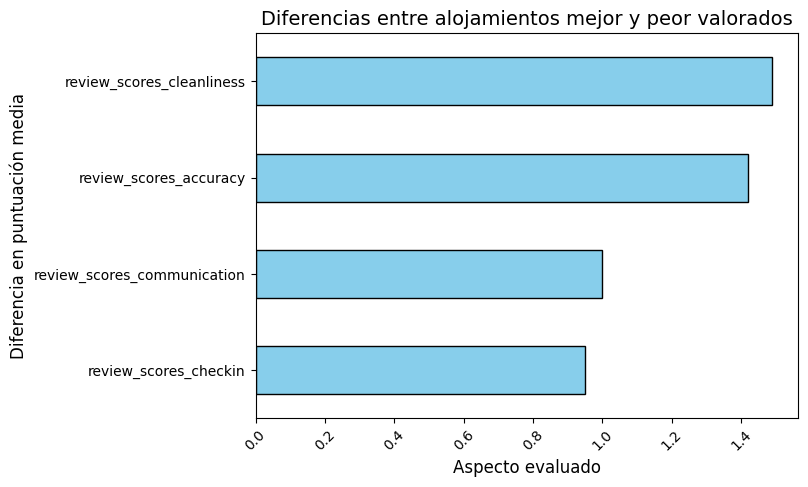

In [29]:
diff.sort_values(ascending=True).plot(
    kind="barh",
    figsize=(7,5),
    color="skyblue",
    edgecolor="black"
)

plt.title("Diferencias entre alojamientos mejor y peor valorados", fontsize=14)
plt.ylabel("Diferencia en puntuación media", fontsize=12)
plt.xlabel("Aspecto evaluado", fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Test estadístico (T-Test)

In [ ]:

cols = [
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication"
]

# Filtrar grupos
grupo_excelente = df_filtered[df_filtered["classification"] == "Excelente"][cols]
grupo_malo = df_filtered[df_filtered["classification"] == "Malo"][cols]

# Medias
media_excelente = grupo_excelente.mean()
media_malo = grupo_malo.mean()

# Diferencias
diferencia = media_excelente - media_malo

# Test t
resultados = {}
for col in cols:
    stat, pval = ttest_ind(
        grupo_excelente[col].dropna(),
        grupo_malo[col].dropna(),
        equal_var=False
    )
    resultados[col] = {"t": stat, "p": pval}

# Construir tabla resumen
tabla_resumen = pd.DataFrame({
    "Media Malo": media_malo.round(2),
    "Media Excelente": media_excelente.round(2),
    "Diferencia": diferencia.round(2),
    "t": [resultados[col]["t"] for col in cols],
    "p-value": [resultados[col]["p"] for col in cols]
})

# Ajustar formato p-value (mostrar <0.001 si es muy pequeño)
tabla_resumen["p-value"] = tabla_resumen["p-value"].apply(lambda x: "<0.001" if x < 0.001 else round(x,4))

print(tabla_resumen)


                             Media Malo  Media Excelente  Diferencia  \
review_scores_accuracy             8.44             9.86        1.42   
review_scores_cleanliness          8.29             9.78        1.49   
review_scores_checkin              8.91             9.86        0.96   
review_scores_communication        8.89             9.89        1.00   

                                     t p-value  
review_scores_accuracy       33.672318  <0.001  
review_scores_cleanliness    33.514427  <0.001  
review_scores_checkin        23.747268  <0.001  
review_scores_communication  25.511419  <0.001  
